In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


In [4]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,54273.0,27136.000000,15667.409917,0.0,13568.0,27136.0,40704.0,54272.0
model_year,54273.0,2015.091979,5.588909,1974.0,2012.0,2016.0,2019.0,2024.0
milage,54273.0,72746.175667,50469.490448,100.0,32268.0,66107.0,102000.0,405000.0
price,54273.0,39218.443333,72826.335535,2000.0,15500.0,28000.0,45000.0,2954083.0


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

C:\Users\HP REVOLVE\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


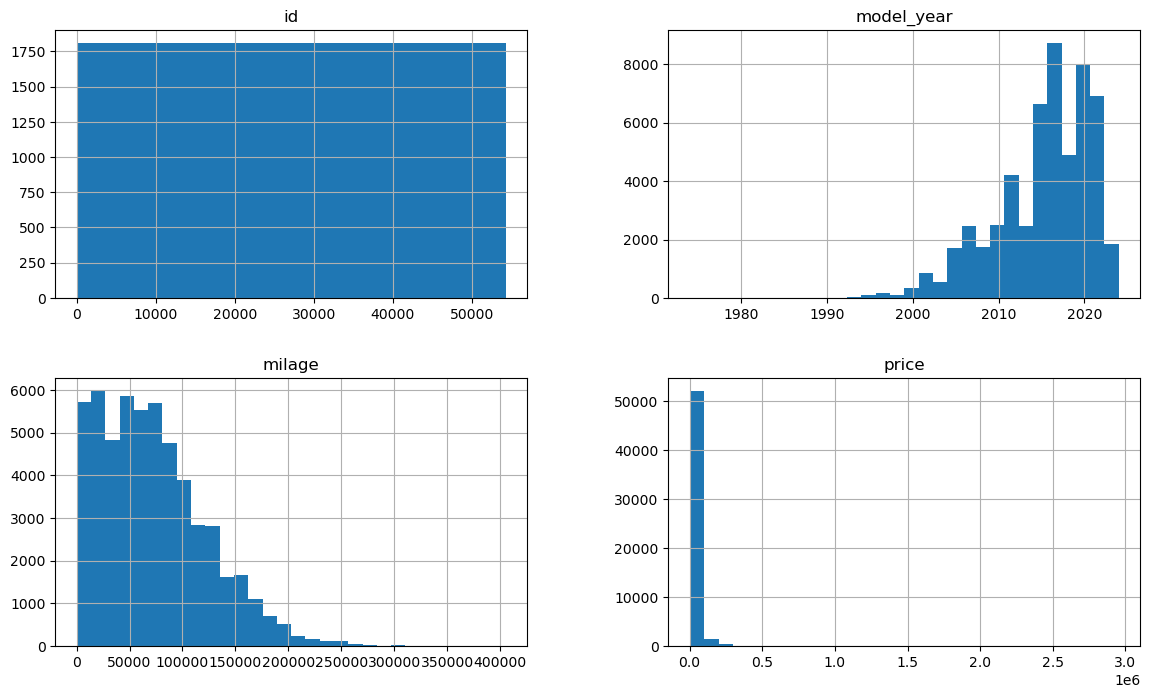

In [6]:
train_df.hist(bins=30, figsize=(14,8))
plt.show()

In [7]:
# creating a validation set
from sklearn.model_selection import train_test_split
train_set, valid_set = train_test_split(train_df, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataset to avoid modifying the original dataset
train_set_encoded = train_set.copy()

# Encode categorical variables
encoder = LabelEncoder()
for column in train_set_encoded.select_dtypes(include=['object']).columns:
    train_set_encoded[column] = encoder.fit_transform(train_set_encoded[column])

# Calculate the Pearson correlation of features with the target variable
correlations = train_set_encoded.corr(method='pearson')['price'].abs()
correlations = correlations.sort_values(ascending=False)
# Print the correlations
print(correlations)


price           1.000000
milage          0.235096
engine          0.206825
model_year      0.202631
accident        0.109793
model           0.023499
int_col         0.016656
ext_col         0.007658
fuel_type       0.003532
brand           0.002818
transmission    0.001432
id              0.000763
clean_title          NaN
Name: price, dtype: float64


Text(0, 0.5, 'Price')

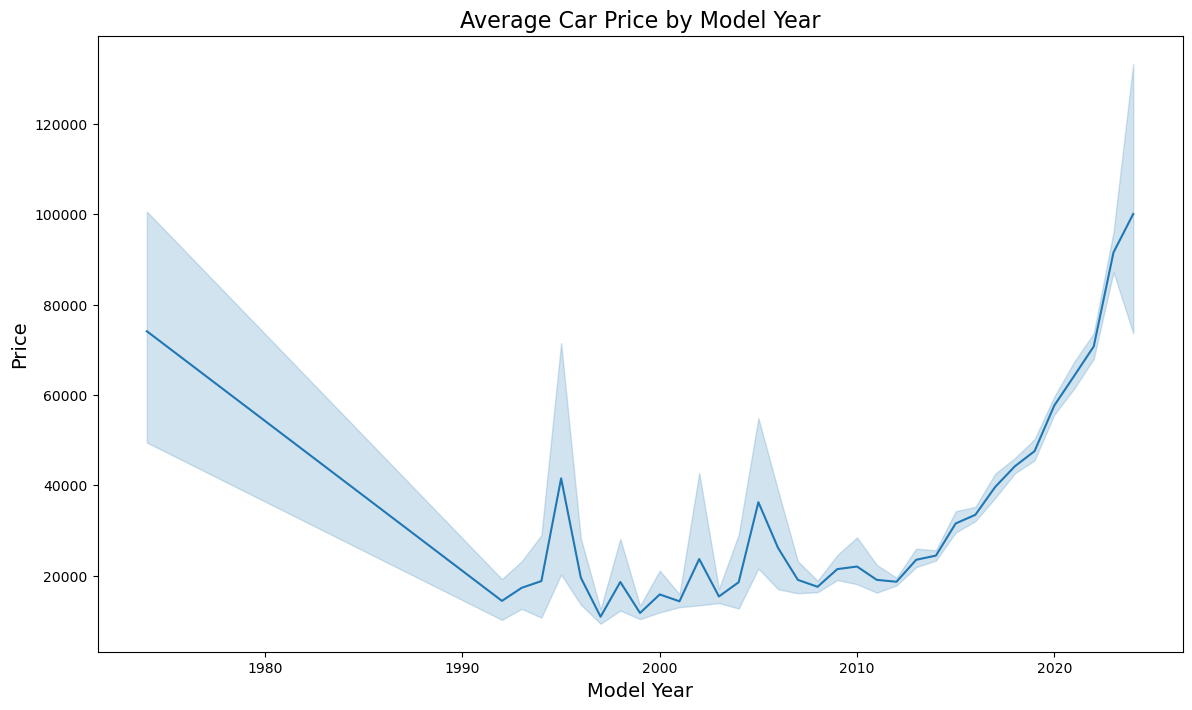

In [16]:
plt.figure(figsize=(14,8))
sns.lineplot(data= train_set, x='model_year', y='price')
plt.title('Average Car Price by Model Year', fontsize=16)
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('Price', fontsize=14)

In [18]:
# train_set[train_set['model_year']<1990]

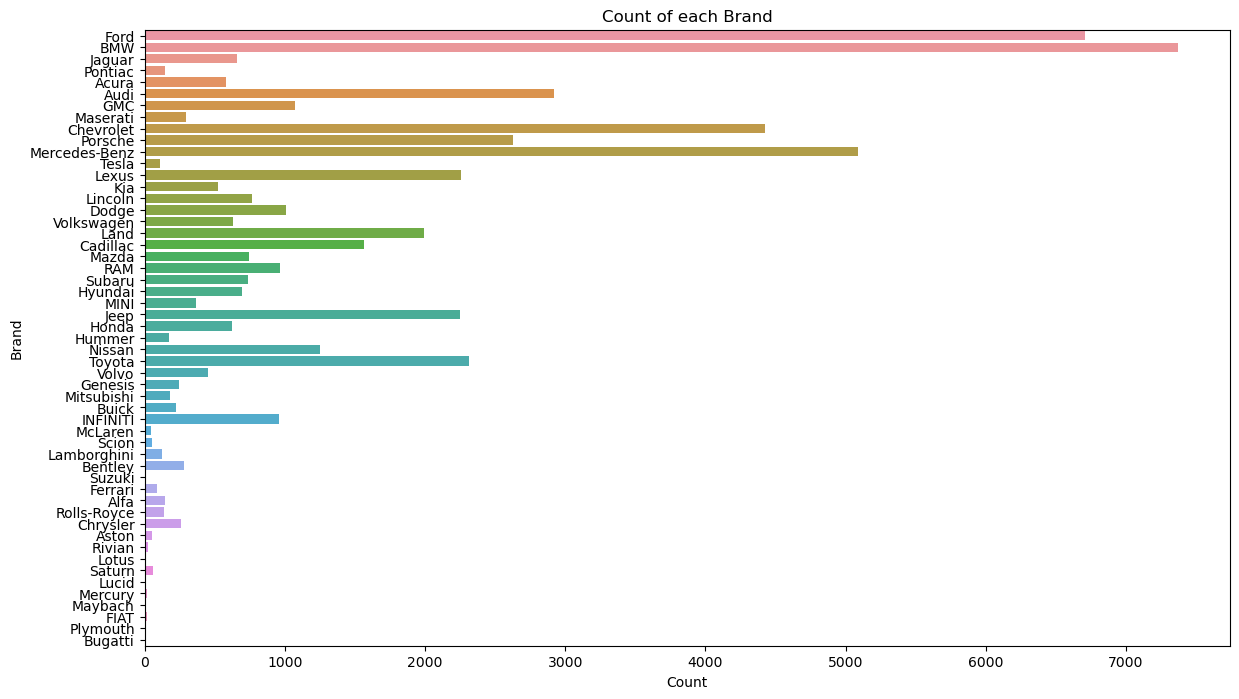

In [23]:
plt.figure(figsize = (14,8))
sns.countplot(data=train_df, y='brand')

plt.title('Count of each Brand')
plt.xlabel('Count')
plt.ylabel('Brand')

plt.show()

In [26]:
# Calculate the average price for each brand
average_price_per_brand = train_df.groupby('brand')['price'].mean().reset_index()

# Print the resulting table
print(average_price_per_brand)

            brand         price
0           Acura  2.789955e+04
1            Alfa  4.571224e+04
2           Aston  1.178858e+05
3            Audi  3.709137e+04
4             BMW  4.027603e+04
5         Bentley  1.052118e+05
6         Bugatti  1.950995e+06
7           Buick  2.769325e+04
8        Cadillac  3.657584e+04
9       Chevrolet  4.475111e+04
10       Chrysler  1.951867e+04
11          Dodge  2.893806e+04
12           FIAT  1.418388e+04
13        Ferrari  1.584043e+05
14           Ford  3.815406e+04
15            GMC  4.157095e+04
16        Genesis  5.146240e+04
17          Honda  1.856890e+04
18         Hummer  3.057899e+04
19        Hyundai  1.893153e+04
20       INFINITI  2.969408e+04
21         Jaguar  3.484040e+04
22           Jeep  3.070334e+04
23            Kia  2.908756e+04
24    Lamborghini  1.447739e+05
25           Land  4.771427e+04
26          Lexus  3.068544e+04
27        Lincoln  2.773362e+04
28          Lotus  3.845658e+04
29          Lucid  8.418500e+04
30      

<AxesSubplot:xlabel='milage', ylabel='price'>

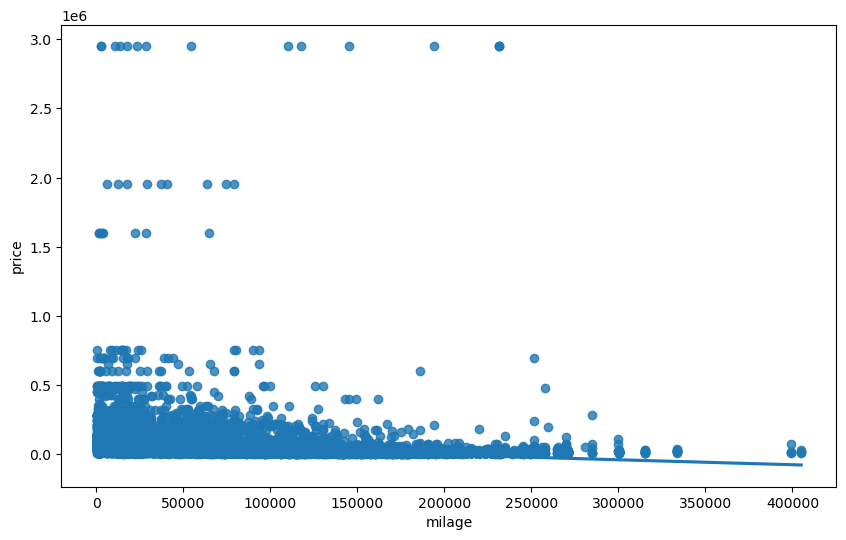

In [27]:
plt.figure(figsize=(10,6))
sns.regplot(data=train_df, x='milage', y='price')

<AxesSubplot:xlabel='fuel_type', ylabel='price'>

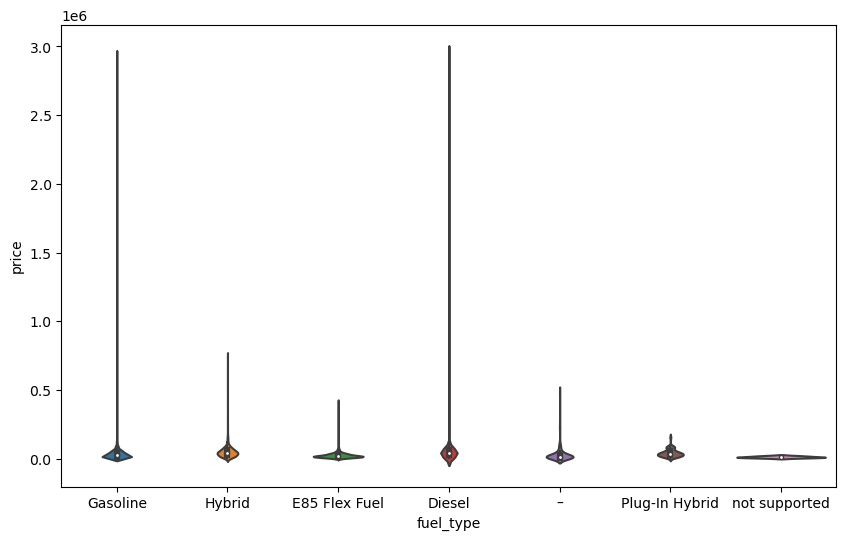

In [28]:
plt.figure(figsize=(10,6))

sns.violinplot(data=train_df, x='fuel_type', y='price')

In [29]:
#train_df.select_dtypes('number').columns
X = train_df.drop(columns =['id','clean_title','price'] )
y = train_df['price'].copy()

In [30]:
X.select_dtypes('object').columns

Index(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
       'int_col', 'accident'],
      dtype='object')

In [31]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

num_attribs = X.select_dtypes('number').columns
cat_attribs = X.select_dtypes('object').columns

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [32]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [33]:
X_prepared = preprocessing.fit_transform(X)

In [34]:
#X_prepared_fr = pd.DataFrame(
    #X_prepared,
    #columns=preprocessing.get_feature_names_out(),
    #index=X.index)
#X_prepared_fr.head(2)

In [35]:
from sklearn.linear_model import LinearRegression
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000177412134C0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                          

In [36]:
train_predictions = lin_reg.predict(X)

In [37]:
train_predictions

array([ 48523.80471262,  17941.73852897,  10436.79926683, ...,
        40770.54420481, 192326.20975362,  32255.87827147])

In [38]:
y

0         11000
1          8250
2         15000
3         63500
4          7850
          ...  
54268     29000
54269      6500
54270     18950
54271    194965
54272     37499
Name: price, Length: 54273, dtype: int64

In [39]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y, train_predictions))
print(f"Root Mean Squared Error: {rmse:.4f}")

Root Mean Squared Error: 63796.3970


In [40]:
X_valid = valid_set.drop(columns=['id','price'])
y_valid = valid_set['price']

In [44]:
valid_predictions = lin_reg.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, valid_predictions))
print(f"Root Mean Squared Error: {rmse:.4f}")

Root Mean Squared Error: 40363.3711


In [45]:
from xgboost import XGBRegressor
xgb_reg = make_pipeline(preprocessing, XGBRegressor())
xgb_reg.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000177412134C0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                   

In [50]:
train_predictions2 = xgb_reg.predict(X)

rmse_train2 = np.sqrt(mean_squared_error(y, train_predictions2))
print(f"Root Mean Squared Error: {rmse_train2:.2f}")

Root Mean Squared Error: 40468.04


In [51]:
valid_predictions2 = xgb_reg.predict(X_valid)

rmse_valid2 = np.sqrt(mean_squared_error(y_valid, valid_predictions2))
print(f"Root Mean Squared Error: {rmse_valid2:.2f}")

Root Mean Squared Error: 32248.70


In [52]:
import xgboost as xgb

xgb_reg2 = make_pipeline(preprocessing, XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4))
#dval = xgb.DMatrix(X_valid, label=y_valid)
xgb_reg2.fit(X, y)
             #early_stopping_rounds=5, 
             #eval_set=[(X_valid, y_valid)],   Pass the validation set directly
             #eval_metric='rmse',   Specify the evaluation metric
             #verbose=False)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000177412134C0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                   

In [53]:
train_predictions3 = xgb_reg2.predict(X)

train_rmse3 = np.sqrt(mean_squared_error(y, train_predictions3))
print(f"Root Mean Squared Error: {train_rmse3:.2f}")

Root Mean Squared Error: 38311.58


In [54]:
valid_predictions3 = xgb_reg2.predict(X_valid)

valid_rmse3 = np.sqrt(mean_squared_error(y_valid, valid_predictions3))
print(f"Root Mean Squared Error: {valid_rmse3:.4f}")

Root Mean Squared Error: 30561.7407


In [95]:
#from sklearn.ensemble import RandomForestRegressor

#rf_reg = make_pipeline(preprocessing, RandomForestRegressor())
#rf_reg.fit(X,y)

In [96]:
#valid_predictions4 = rf_reg.predict(X_valid)

#rmsle_valid4 = np.sqrt(mean_squared_log_error(abs(y_valid), abs(valid_predictions4)))
#print(f"Root Mean Logarithmic Error on Validation set: {rmsle_valid4:.4f}")

In [55]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.head()

,id,price
0,54273,39218.443
1,54274,39218.443
2,54275,39218.443
3,54276,39218.443
4,54277,39218.443


In [56]:
test_df = pd.read_csv('test.csv')

In [57]:
test_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes
2,54275,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes
3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes
4,54277,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes


In [58]:
test_df['clean_title'].unique()

array(['Yes'], dtype=object)

In [59]:
test_df2 = test_df.copy()
test_df2.drop(columns= ['id','clean_title'], inplace=True)

In [60]:
submission = sample_submission.copy()
submission['price'] = xgb_reg2.predict(test_df2)

In [61]:
submission['price'] = submission['price'].abs().round(2)

In [62]:
submission.head()

,id,price
0,54273,23624.890625
1,54274,21936.109375
2,54275,33127.441406
3,54276,53241.308594
4,54277,41130.679688


In [63]:
# Save the DataFrame as a CSV file
submission.to_csv('submission.csv', index=False)
print('File "submission.csv" has been saved in the current directory.')

File "submission.csv" has been saved in the current directory.
